In [1]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

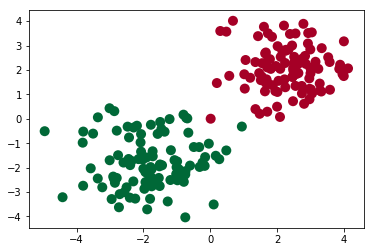

In [2]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1)
y0 = torch.zeros(100)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(100)

# torch.cat(input, dimension=0) 在给定的维度上对输入的tensor序列进行连接
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [4]:
net = Net(2, 10, 2)
print(net)

plt.ion()

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


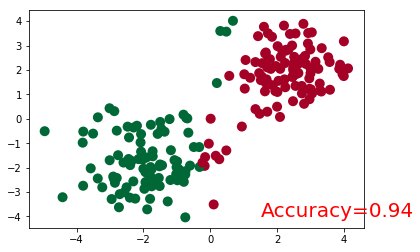

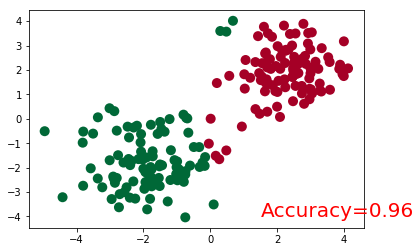

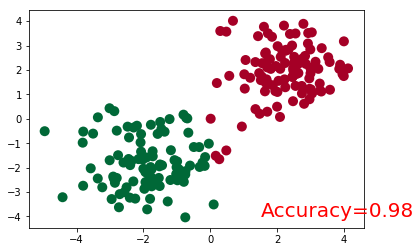

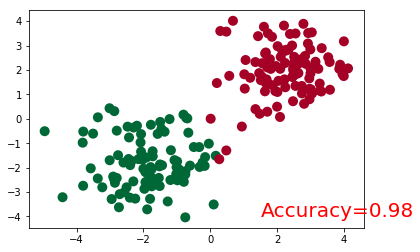

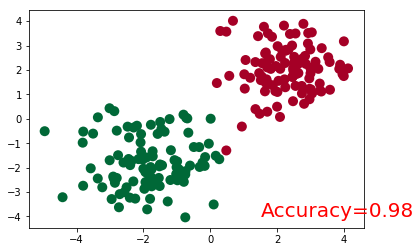

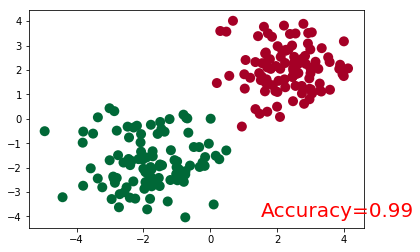

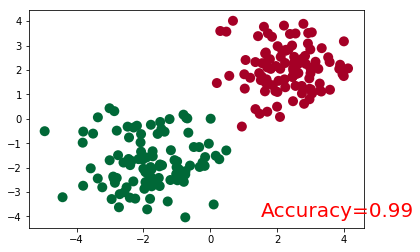

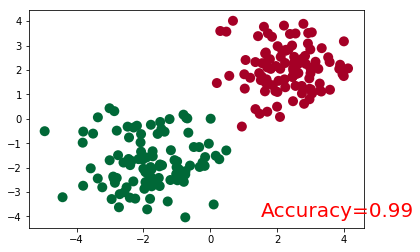

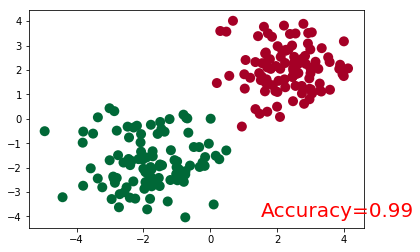

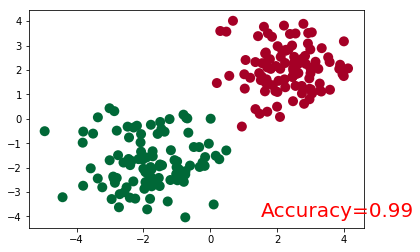

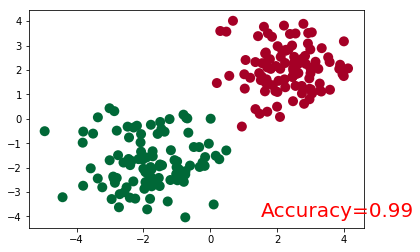

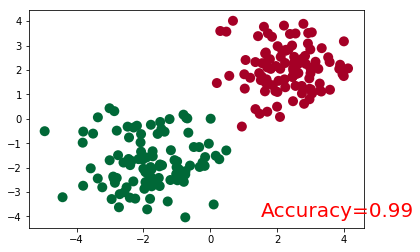

In [5]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    output = net(x)
    loss = loss_func(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if(t % 10 == 0 or t in [3, 6]):
        plt.cla()
        _, prediction = torch.max(F.softmax(output, dim=1), 1)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.0
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()